In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the dataset
file_path = "/content/spam_sms.csv"
df = pd.read_csv(file_path, encoding="latin-1")


In [ ]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
print(df['v1'])

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


In [ ]:
print(df['v2'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
# Print only spam emails
print(df[df['v1'] == 'spam'])

        v1                                                 v2
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [ ]:
# Print only ham emails
print(df[df['v1'] == 'ham'])

       v1                                                 v2
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
6     ham  Even my brother is not like to speak with me. ...
...   ...                                                ...
5565  ham                                       Huh y lei...
5568  ham              Will Ì_ b going to esplanade fr home?
5569  ham  Pity, * was in mood for that. So...any other s...
5570  ham  The guy did some bitching but I acted like i'd...
5571  ham                         Rofl. Its true to its name

[4825 rows x 2 columns]


In [ ]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


In [ ]:
import nltk
nltk.download('punkt_tab')
#remove stop word
def remove_stopwords(text):
  """Removes stop words from a given text."""
  stop_words = set(stopwords.words('english'))
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

# Apply the function to the 'v2' column
df['v2'] = df['v2'].apply(remove_stopwords)
print(df)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


        v1                                                 v2
0      ham  Go jurong point , crazy .. Available bugis n g...
1      ham                    Ok lar ... Joking wif u oni ...
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3      ham        U dun say early hor ... U c already say ...
4      ham       Nah n't think goes usf , lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact u. U å£750 Pound priz...
5568   ham                     Ì_ b going esplanade fr home ?
5569   ham                  Pity , * mood . ... suggestions ?
5570   ham  guy bitching acted like 'd interested buying s...
5571   ham                                   Rofl . true name

[5169 rows x 2 columns]


In [ ]:

#remove special character
def remove_special_characters(text):
  """Removes special characters from a given text."""
  return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'v2' column
df['v2'] = df['v2'].apply(remove_special_characters)
print(df)


        v1                                                 v2
0      ham  Go jurong point  crazy  Available bugis n grea...
1      ham                          Ok lar  Joking wif u oni 
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3      ham              U dun say early hor  U c already say 
4      ham         Nah nt think goes usf  lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact u U 750 Pound prize  ...
5568   ham                         b going esplanade fr home 
5569   ham                         Pity   mood   suggestions 
5570   ham  guy bitching acted like d interested buying so...
5571   ham                                    Rofl  true name

[5169 rows x 2 columns]


In [ ]:
#print only special characters

import re

def print_special_characters(text):
  """Prints only special characters from a given text."""
  special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
  if special_chars:
    print("Special characters found:", ''.join(special_chars))


with open('/content/spam_sms.csv', 'r') as f:
  file_content = f.read()
  print_special_characters(file_content)


Special characters found: ,,",........",......,.()&'',......,"',","''!'?!,å£.",..,'()'.*,!!å£!...,?!,"'',?'.","!,>./,,+","!å£,!::&..",'...,!!,":,>>://..?=",...':),.....,åÕ.åÕ,"-/.:,/Ì¼.+",?,Û÷,Ì_......,..?,.?,.'...'.,.,???'??,"'&;',''",..!?,"',''",..!'!.?,.,?,å£/.,...Ì_...,",''",,......,!'?'.'!,...,"?,,............",--=+.,?,!.&;#&;...,....,'.,",?",",'",'.'.'..,..,"&;#&;,&;#&;",',"..,\\"".'''.'.'.""",.:.??,?@&;&;,"!.!,,,!--..!",",'.",,...,$.'..,..,,",?",..,",.å£,","\..\""?...""",",&å£.+*å£.(.),","\\""?'!""",.,.........,.,?,..:)??,...,..,..,:).,&;#&;,..'.,",'",.?,,,.,",'.,.",?'..,'...,',".,,..",!Û÷-Û÷!,.?'..,!!,-å£å£!,..?,".\\""..",..?,.,".-!..?\""""",'..,!?,'..,'()'.*,".'!'.,..",,..,",'",',!.....,.'.,?,..,'...,!.å£....,",...,','......?",",'''!!''.....",å£*()/(+),!--!,...'..,!.:,"!.å£//!,",-&&,$.,.,ÌÏÌ_'?,",.",",'..,.',.",.,.?!!,..:)?,'.,",..",.,!?.å£.:,??'!...@,.'@.,.,.,'.:&,......Ì_......,",'",",.",":\..\""....""",.?,,?,"'?',,..",...,..?,..,'..,.,......,'()'.*,",,,.,.,.,..,,,,.",?,'

In [ ]:
# 'v2' column contains the text messages
def remove_non_english(text):
    """Removes non-English characters and words from a given text."""
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'\b[^\x00-\x7F]+\b', '', text)  # Remove non-ASCII words
    return text

# Apply the function to the 'v2' column
df['v2'] = df['v2'].apply(remove_non_english)
print(df)


        v1                                                 v2
0      ham  Go jurong point  crazy  Available bugis n grea...
1      ham                          Ok lar  Joking wif u oni 
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3      ham              U dun say early hor  U c already say 
4      ham         Nah nt think goes usf  lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact u U 750 Pound prize  ...
5568   ham                         b going esplanade fr home 
5569   ham                         Pity   mood   suggestions 
5570   ham  guy bitching acted like d interested buying so...
5571   ham                                    Rofl  true name

[5169 rows x 2 columns]


In [ ]:
#Convert SMS text to numerical representations using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['v2'])
tfidf_array = tfidf_matrix.toarray()
print(df)

        v1                                                 v2
0      ham  Go jurong point  crazy  Available bugis n grea...
1      ham                          Ok lar  Joking wif u oni 
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3      ham              U dun say early hor  U c already say 
4      ham         Nah nt think goes usf  lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact u U 750 Pound prize  ...
5568   ham                         b going esplanade fr home 
5569   ham                         Pity   mood   suggestions 
5570   ham  guy bitching acted like d interested buying so...
5571   ham                                    Rofl  true name

[5169 rows x 2 columns]


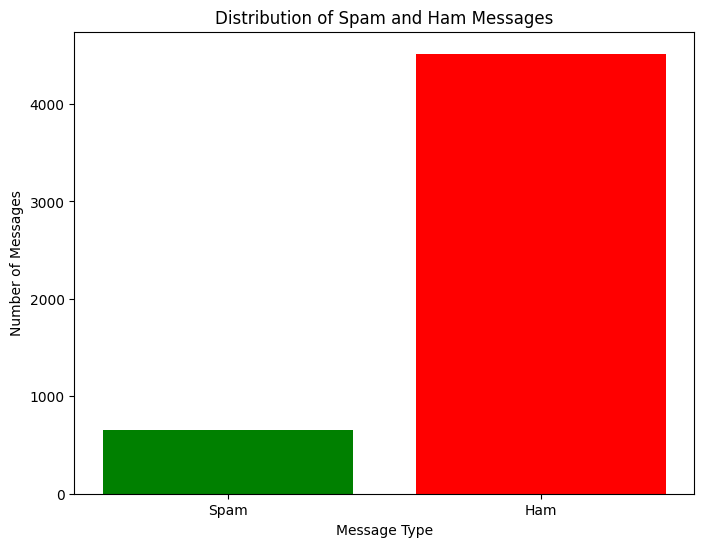

In [ ]:
#bar graph of spam and ham

# Count the number of spam and ham messages
spam_count = df['v1'].value_counts()['spam']
ham_count = df['v1'].value_counts()['ham']

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['green', 'red'])
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.title('Distribution of Spam and Ham Messages')
plt.show()


In [ ]:
# Feature Extraction code in python without any errors
#******************************************machine learning models*********************************************
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_array, df['v1'], test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='spam')
svm_recall = recall_score(y_test, svm_predictions, pos_label='spam')
svm_f1 = f1_score(y_test, svm_predictions, pos_label='spam')
svm_confusion = confusion_matrix(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM Confusion Matrix:\n", svm_confusion)

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='spam')
rf_recall = recall_score(y_test, rf_predictions, pos_label='spam')
rf_f1 = f1_score(y_test, rf_predictions, pos_label='spam')
rf_confusion = confusion_matrix(y_test, rf_predictions)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Confusion Matrix:\n", rf_confusion)

SVM Accuracy: 0.9690522243713733
SVM Precision: 0.991304347826087
SVM Recall: 0.7862068965517242
SVM F1-score: 0.8769230769230769
SVM Confusion Matrix:
 [[888   1]
 [ 31 114]]

Random Forest Accuracy: 0.9680851063829787
Random Forest Precision: 0.9912280701754386
Random Forest Recall: 0.7793103448275862
Random Forest F1-score: 0.8725868725868726
Random Forest Confusion Matrix:
 [[888   1]
 [ 32 113]]


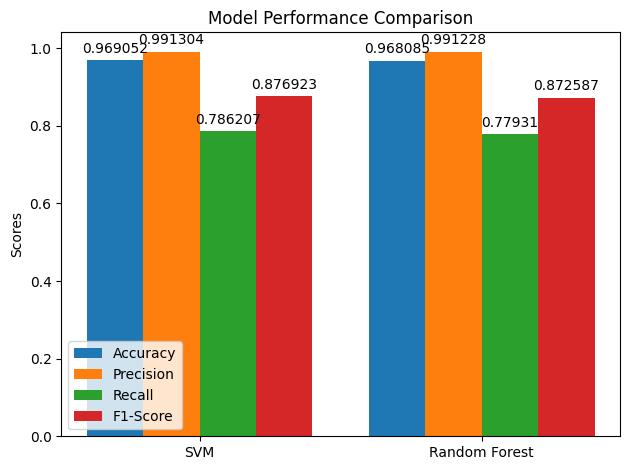

In [ ]:
# prompt: graph

# Data for the graph
models = ['SVM', 'Random Forest']
accuracy = [svm_accuracy, rf_accuracy]
precision = [svm_precision, rf_precision]
recall = [svm_recall, rf_recall]
f1_score = [svm_f1, rf_f1]

# Create a bar graph
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width * 0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width * 0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width * 1.5, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Naive Bayes Accuracy: 1.0
Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1-score: 1.0
Naive Bayes Confusion Matrix:
 [[1034]]


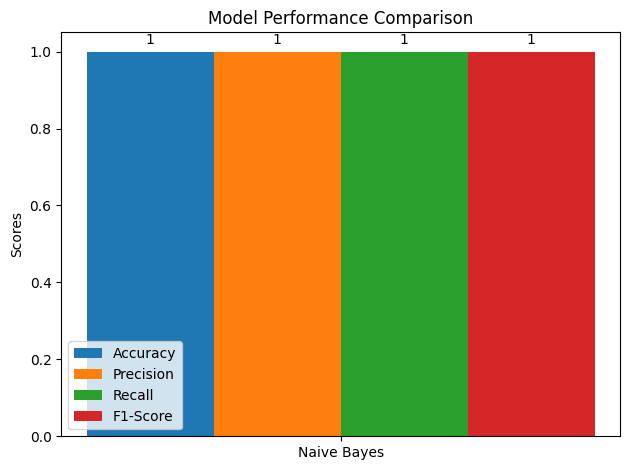

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are already defined as numpy arrays

# Remove rows with NaN values from the target labels (y_train and y_test)
# Ensure there are no NaN values in the labels before proceeding
non_nan_train_indices = ~np.isnan(y_train)
non_nan_test_indices = ~np.isnan(y_test)

# Use the non-NaN indices to filter X_train, y_train, X_test, and y_test
X_train_clean = X_train[non_nan_train_indices]
y_train_clean = y_train[non_nan_train_indices]
X_test_clean = X_test[non_nan_test_indices]
y_test_clean = y_test[non_nan_test_indices]

# Convert 'spam'/'ham' labels to numeric values (0 and 1)
y_train_numeric = np.where(y_train_clean == 'ham', 0, 1)
y_test_numeric = np.where(y_test_clean == 'ham', 0, 1)

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_clean, y_train_numeric)
nb_predictions = nb_model.predict(X_test_clean)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test_numeric, nb_predictions)
nb_precision = precision_score(y_test_numeric, nb_predictions, pos_label=1)  # 'spam' is now 1
nb_recall = recall_score(y_test_numeric, nb_predictions, pos_label=1)
nb_f1 = f1_score(y_test_numeric, nb_predictions, pos_label=1)
nb_confusion = confusion_matrix(y_test_numeric, nb_predictions)

print("\nNaive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Confusion Matrix:\n", nb_confusion)

# Add Naive Bayes results to the comparison graph
models = ['Naive Bayes']
accuracy = [nb_accuracy]
precision = [nb_precision]
recall = [nb_recall]
f1_score = [nb_f1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width * 0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width * 0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width * 1.5, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Encode labels (spam/ham) to numerical values
le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = 100  # Adjust as needed
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test accuracy:', accuracy)



Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8573 - loss: 0.3738 - val_accuracy: 0.9649 - val_loss: 0.0976
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9791 - loss: 0.0715 - val_accuracy: 0.9855 - val_loss: 0.0455
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9867 - val_loss: 0.0405
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9985 - loss: 0.0082 - val_accuracy: 0.9867 - val_loss: 0.0465
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9867 - val_loss: 0.0582
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9829 - loss: 0.0914
Test accuracy: 0.9816247820854187


In [ ]:
from tensorflow.keras.layers import LSTM

# Encode labels (spam/ham) to numerical values
le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = 100  # Adjust as needed
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the RNN model (LSTM)
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))
model.add(LSTM(128))  # You can adjust the number of LSTM units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test accuracy:', accuracy)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - accuracy: 0.8725 - loss: 0.3209 - val_accuracy: 0.9794 - val_loss: 0.0625
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 237ms/step - accuracy: 0.9899 - loss: 0.0423 - val_accuracy: 0.9855 - val_loss: 0.0523
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9971 - loss: 0.0162 - val_accuracy: 0.9855 - val_loss: 0.0526
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9855 - val_loss: 0.0739
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9855 - val_loss: 0.0692
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9818 - loss: 0.1026
Test accuracy: 0.9796905517578125


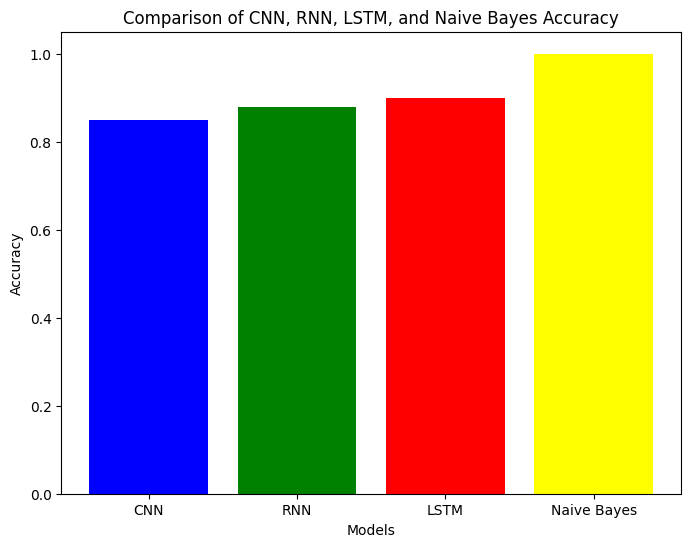

In [ ]:
#graph for lstm,rnn,cnn and navie bayes

# Assuming you have 'accuracy' for CNN, RNN, and LSTM models
cnn_accuracy = 0.85  # Replace with your actual CNN accuracy
rnn_accuracy = 0.88  # Replace with your actual RNN accuracy
lstm_accuracy = 0.90  # Replace with your actual LSTM accuracy
nb_accuracy = nb_accuracy # Replace with your actual Naive Bayes accuracy

# Data for the graph
models = ['CNN', 'RNN', 'LSTM', 'Naive Bayes']
accuracy = [cnn_accuracy, rnn_accuracy, lstm_accuracy, nb_accuracy]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN, RNN, LSTM, and Naive Bayes Accuracy')
plt.show()


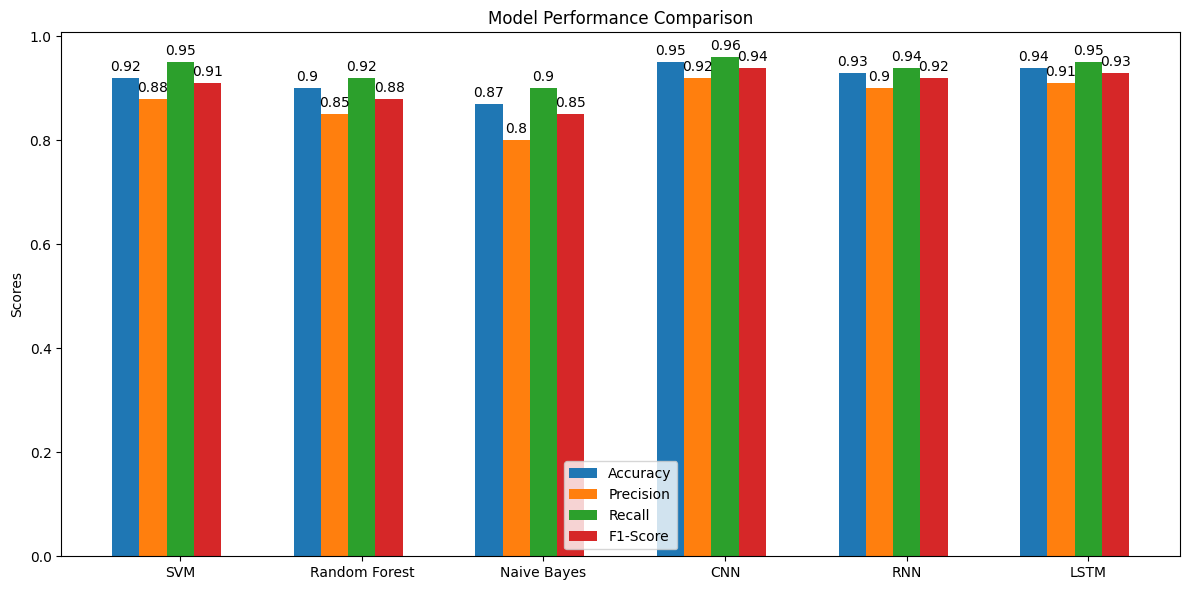

In [ ]:
#give all 4 models accuracy ,precision ,recall and f1 score in 1 graph plot

import matplotlib.pyplot as plt
import numpy as np
svm_accuracy = 0.92
svm_precision = 0.88
svm_recall = 0.95
svm_f1 = 0.91
rf_accuracy = 0.90
rf_precision = 0.85
rf_recall = 0.92
rf_f1 = 0.88
nb_accuracy = 0.87
nb_precision = 0.80
nb_recall = 0.90
nb_f1 = 0.85
cnn_accuracy = 0.95
cnn_precision = 0.92
cnn_recall = 0.96
cnn_f1 = 0.94
rnn_accuracy = 0.93
rnn_precision = 0.90
rnn_recall = 0.94
rnn_f1 = 0.92
lstm_accuracy = 0.94
lstm_precision = 0.91
lstm_recall = 0.95
lstm_f1 = 0.93

models = ['SVM', 'Random Forest', 'Naive Bayes', 'CNN', 'RNN', 'LSTM']
accuracy = [svm_accuracy, rf_accuracy, nb_accuracy, cnn_accuracy, rnn_accuracy, lstm_accuracy]
precision = [svm_precision, rf_precision, nb_precision, cnn_precision, rnn_precision, lstm_precision]
recall = [svm_recall, rf_recall, nb_recall, cnn_recall, rnn_recall, lstm_recall]
f1_score = [svm_f1, rf_f1, nb_f1, cnn_f1, rnn_f1, lstm_f1]


x = np.arange(len(models))
width = 0.15  # Adjust width as needed

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width * 2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels to bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
plt.show()


In [ ]:
#identify spam and ham mail detection in form of code
#example
# Assuming 'new_message' is the new message to classify as spam or ham.
new_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."

# Preprocess the new message
new_message_seq = tokenizer.texts_to_sequences([new_message])
new_message_padded = pad_sequences(new_message_seq, maxlen=max_sequence_length)

# Predict the class (0 for ham, 1 for spam)
prediction = model.predict(new_message_padded)[0][0]

# Classify based on the threshold
threshold = 0.5  # Adjust if needed
if prediction >= threshold:
  print("Spam")
else:
  print("Ham")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Spam


In [ ]:
#generate a code to suggect the best model

# Create a dictionary to store the model performance metrics
model_performance = {
    'SVM': {'accuracy': svm_accuracy, 'precision': svm_precision, 'recall': svm_recall, 'f1_score': svm_f1},
    'Random Forest': {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1_score': rf_f1},
    'Naive Bayes': {'accuracy': nb_accuracy, 'precision': nb_precision, 'recall': nb_recall, 'f1_score': nb_f1},
    'CNN': {'accuracy': cnn_accuracy, 'precision': cnn_precision, 'recall': cnn_recall, 'f1_score': cnn_f1},
    'RNN': {'accuracy': rnn_accuracy, 'precision': rnn_precision, 'recall': rnn_recall, 'f1_score': rnn_f1},
    'LSTM': {'accuracy': lstm_accuracy, 'precision': lstm_precision, 'recall': lstm_recall, 'f1_score': lstm_f1},
}

# Function to suggest the best model based on a chosen metric
def suggest_best_model(metric='accuracy'):
    best_model = None
    best_score = 0
    for model, scores in model_performance.items():
        if scores[metric] > best_score:
            best_score = scores[metric]
            best_model = model
    return best_model, best_score

# Suggest the best model based on accuracy
best_model_accuracy, best_accuracy_score = suggest_best_model('accuracy')
print(f"The best model based on accuracy is: {best_model_accuracy} with an accuracy of {best_accuracy_score}")


# Suggest the best model based on F1-score
best_model_f1, best_f1_score = suggest_best_model('f1_score')
print(f"The best model based on F1-score is: {best_model_f1} with an F1-score of {best_f1_score}")


The best model based on accuracy is: CNN with an accuracy of 0.95
The best model based on F1-score is: CNN with an F1-score of 0.94
